### Bài tập 1 (kỹ thuật đọc và xử lý dữ liệu từ file .csv): Cho trước file dữ liệu advertising.csv, hãy hoàn thành function prepare_data(file_name_dataset) trả về dữ liệu đã được tổ chức (X cho input và y cho output).

In [3]:
# dataset
import numpy as np
import matplotlib . pyplot as plt
import random

def get_column ( data , index ) :
 result = []
 for indx in range(len(data)):
    result.append(data[indx][index])
 return result

def prepare_data ( file_name_dataset ) :
 data = np.genfromtxt ( file_name_dataset , delimiter =',', skip_header =1) . tolist ()
 N = len( data )

 # get tv ( index =0)
 tv_data = get_column ( data , 0)

 # get radio ( index =1)
 radio_data = get_column ( data , 1)

 # get newspaper ( index =2)
 newspaper_data = get_column ( data , 2)
 # get sales ( index =3)
 sales_data = get_column ( data , 3)

 # building X input and y output for training
 X = [ tv_data , radio_data , newspaper_data ]
 y = sales_data
 return X , y

### Q1:

In [4]:
X , y = prepare_data ('data.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


### Bài tập 2 (kỹ thuật huấn luyện data dùng one sample - linear regression): Sử dụng kết quả dữ liệu đầu vào X, và dữ liệu đầu ra y từ bài 1, để phát triển chương trình dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức 
### Mean Squared Error L = (ˆy − y)**2
### Sơ đồ hoạt động của giải thuật được mô tả ở hình 2. Nhiệm vụ của bạn là hoàn thành function implement_linear_regression(X_data, y_data, epoch_max, lr) và trả về 4 tham số w1, w2, w3, b và lịch sử tính loss như bên dưới.

In [42]:
def initialize_params () :
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 ,
    -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :
    return x1*w1 + x2*w2 + x3*w3 + b

def compute_loss_mse ( y_hat , y ) :
    return (y_hat - y)**2

def compute_gradient_wi (xi , y , y_hat ) :
    return 2*xi*(y_hat - y)

def compute_gradient_b (y , y_hat ) :
    return 2*(y_hat - y)

def update_weight_wi (wi, dl_dwi, lr) :
    return wi - lr*dl_dwi

def update_weight_b (b, dl_db, lr):
    return b - lr*dl_db

def implement_linear_regression ( X_data , y_data , epoch_max = 50 , lr = 1e-5) :
    losses = []
    w1 , w2 , w3 , b = initialize_params ()
    N = len( y_data )
    for epoch in range ( epoch_max ) :
        for i in range ( N ) :
            # get a sample
            x1 = X_data [0][ i ]
            x2 = X_data [1][ i ]
            x3 = X_data [2][ i ]

            y = y_data [ i ]

            # compute output
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

            # compute loss
            loss = compute_loss_mse (y_hat , y )

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b (y , y_hat )

            # update parameters
            w1 = update_weight_wi ( w1 , dl_dw1 , lr )
            w2 = update_weight_wi ( w2 , dl_dw2 , lr )
            w3 = update_weight_wi ( w3 , dl_dw3 , lr )
            b = update_weight_b (b , dl_db , lr )
            # logging
            losses . append ( loss )
    return ( w1 , w2 , w3 ,b , losses )

### Q2:

In [43]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )

1.0


### Q3:

In [44]:
l = compute_loss_mse ( y_hat =1 , y =0.5)
print ( l )

0.25


### Q4:

In [45]:
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


### Q5:

In [46]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


### Q6:

In [47]:
after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


### Q7:

In [48]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


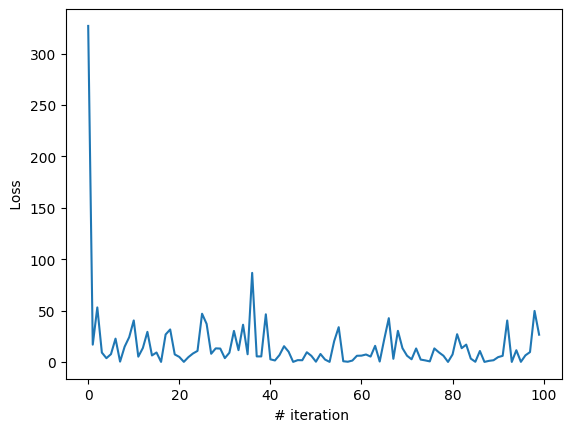

In [23]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
plt . plot ( losses[:100] )
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

### Q8:

In [49]:
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


### Q9:

In [50]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X , y = prepare_data ('data.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


### Q10: MAE

In [19]:
def initialize_params () :
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355,
                     -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b) :
    return x1*w1 + x2*w2 + x3*w3 + b

def compute_loss_mae(y_hat, y) :
    return abs(y_hat - y)

def compute_gradient_wi(xi, y, y_hat):
    # Gradient for MAE loss
    return  xi*(y_hat-y) / abs(y_hat-y)

def compute_gradient_b(y, y_hat):
    return (y_hat-y) / abs(y_hat-y)

def update_weight_wi(wi, dl_dwi, lr) :
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return w1, w2, w3, b, losses


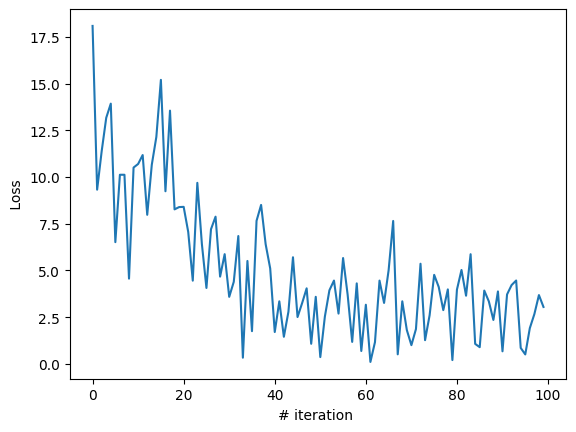

In [18]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
plt . plot ( losses[:100] )
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [53]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


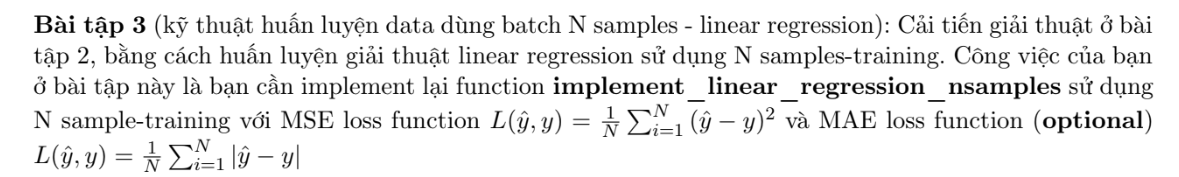

In [54]:
def initialize_params () :
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355,
                     -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b) :
    return x1*w1 + x2*w2 + x3*w3 + b

def compute_loss_mse ( y_hat , y ) :
    return (y_hat - y)**2

def compute_gradient_wi (xi , y , y_hat ) :
    return 2*xi*(y_hat - y)

def compute_gradient_b (y , y_hat ) :
    return 2*(y_hat - y)

def update_weight_wi(wi, dl_dwi, lr) :
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

def implement_linear_regression_nsamples (X_data , y_data , epoch_max  , lr ) :
    losses = []
    w1 , w2 , w3 , b = initialize_params ()
    N = len( y_data )
    for epoch in range ( epoch_max ) :
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        for i in range ( N ) :
            # get a sample
            x1 = X_data [0][ i ]
            x2 = X_data [1][ i ]
            x3 = X_data [2][ i ]
            y = y_data [ i ]
            # compute output
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )
            # compute loss
            loss = compute_loss_mse (y , y_hat )
            # accumulate loss
            loss_total += loss
            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b ( y , y_hat )
            # accumulate gradient w1 , w2 , w3 , b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        # ( after processing N samples ) - update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)
        # logging
        losses . append ( loss_total / N )
    return ( w1 , w2 , w3 ,b , losses )

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

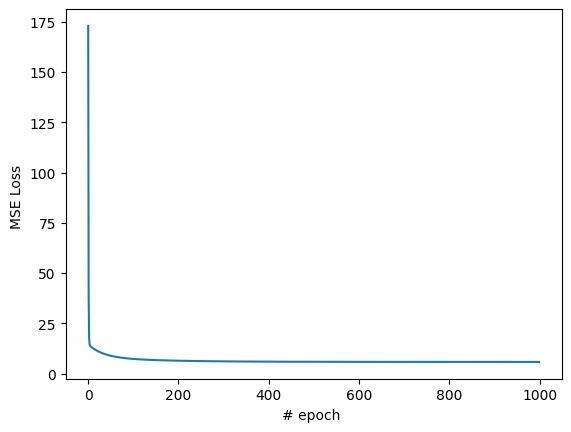

In [55]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y ,
epoch_max =1000 , lr =1e-5)
print ( losses )
plt . plot ( losses )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

### Q11:

In [56]:
X , y = prepare_data ('data.csv')
# using MSE loss
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y ,
epoch_max =1000 ,lr =1e-5)

print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403


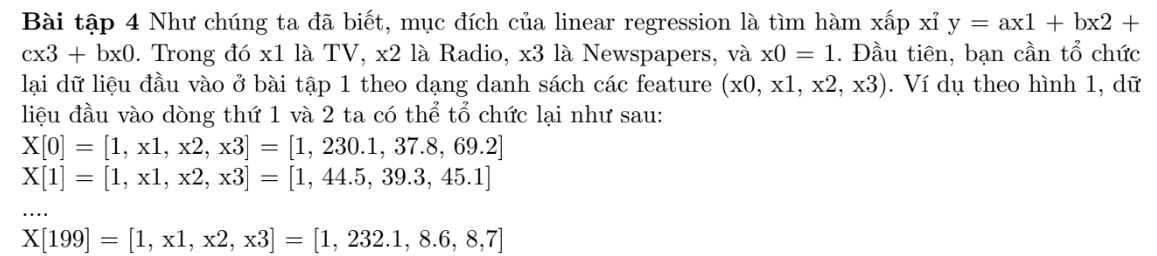

In [57]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

In [25]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x] for (x1, x2, x) in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [26]:
X,y = prepare_data('data.csv')
print(X[0:5])

[[1, 230.1, 37.8, 69.2], [1, 44.5, 39.3, 45.1], [1, 17.2, 45.9, 69.3], [1, 151.5, 41.3, 58.5], [1, 180.8, 10.8, 58.4]]


In [35]:
def initialize_params():
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

def predict(X_features, weights):
    return weights[0] + X_features[1] * weights[1] + X_features[2] * weights[2] \
    + X_features[3] * weights[3]

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_wi(X_features, y, y_hat):
    dl_dw1 = 2 * X_features[1] * (y_hat - y)
    dl_dw2 = 2 * X_features[2] * (y_hat - y)
    dl_dw3 = 2 * X_features[3] * (y_hat - y)
    dl_db = 2 * (y_hat - y) 
    return [dl_db, dl_dw1, dl_dw2, dl_dw3]

# update weights
def update_weight(weights, dl_dweights, lr):
    w1 = weights[1] - lr*dl_dweights[1]
    w2 = weights[2] - lr*dl_dweights[2]
    w3 = weights[3] - lr*dl_dweights[3]
    b = weights[0] - lr*dl_dweights[0]
    return [b, w1, w2, w3]
    
def implement_linear_regression(X_feature, y_ouput, epoch_max = 50,lr = 1e-5):
  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
    print("epoch", epoch)
    for i in range(N):
        # get a sample - row i     
        features_i = X_feature[i]
        y = y_ouput[i]
        
        # compute output 
        y_hat = predict(features_i, weights)
        # compute loss
        loss = compute_loss(y_hat, y)
        # compute gradient w1, w2, w3, b
        dl_dweights = compute_gradient_wi(features_i, y, y_hat)
    
        # update parameters
        weights = update_weight(weights, dl_dweights, lr)
        # logging
        losses.append(loss) 
  return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


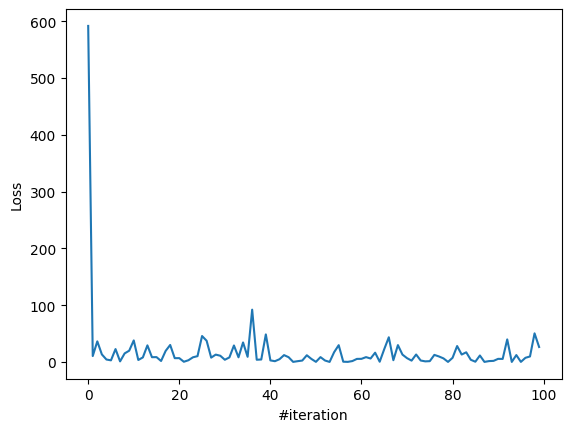

In [36]:
X,y = prepare_data('data.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

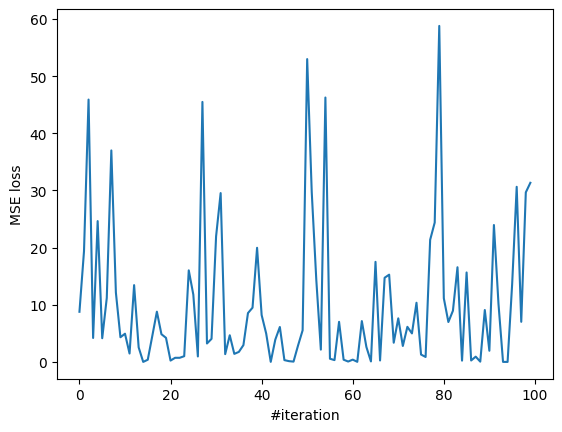

In [37]:
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()

### Q12:

In [38]:
X , y = prepare_data ('data.csv')
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print ( L [9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
